In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv files
df=pd.read_csv('winequality-red.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Data Exploration (exploratory data analysis or EDA)


In [3]:
#Display The head ==> To Check if Data is Properly Imported
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#To check the shape of the dataset
df.shape # (rows, columns)

(1599, 12)

In [5]:
#features in data
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
#checking datatypes
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#Lets describe the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# Are there any missing values?
df.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of fixed acidity : 96
number of unique valuse of volatile acidity : 143
number of unique valuse of citric acid : 80
number of unique valuse of residual sugar : 91
number of unique valuse of chlorides : 153
number of unique valuse of free sulfur dioxide : 60
number of unique valuse of total sulfur dioxide : 144
number of unique valuse of density : 436
number of unique valuse of pH : 89
number of unique valuse of sulphates : 96
number of unique valuse of alcohol : 65
number of unique valuse of quality : 6


In [11]:
#lets check the correlation matrix
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# Univariate  Analysis

In [12]:
# Let's find out how many of each class there
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
#Sex percentage in dataset
print('Percentage',df.quality.value_counts(normalize=True))

Percentage 5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64


Text(0.5, 6.79999999999999, '0 = No claim , 1 = Claim')

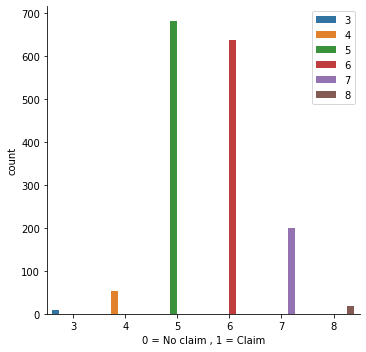

In [14]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='quality',data=df,kind='count',hue='quality')
plt.legend()
plt.xlabel("0 = No claim , 1 = Claim")
#here we we see data is imbalanced but all the classes have significant number of instances

We can see that most of the quality of wines is 5 and 6 in the dataset 


fixed acidity               AxesSubplot(0.125,0.71587;0.227941x0.16413)
volatile acidity         AxesSubplot(0.398529,0.71587;0.227941x0.16413)
citric acid              AxesSubplot(0.672059,0.71587;0.227941x0.16413)
residual sugar             AxesSubplot(0.125,0.518913;0.227941x0.16413)
chlorides               AxesSubplot(0.398529,0.518913;0.227941x0.16413)
free sulfur dioxide     AxesSubplot(0.672059,0.518913;0.227941x0.16413)
total sulfur dioxide       AxesSubplot(0.125,0.321957;0.227941x0.16413)
density                 AxesSubplot(0.398529,0.321957;0.227941x0.16413)
pH                      AxesSubplot(0.672059,0.321957;0.227941x0.16413)
sulphates                     AxesSubplot(0.125,0.125;0.227941x0.16413)
alcohol                    AxesSubplot(0.398529,0.125;0.227941x0.16413)
quality                    AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

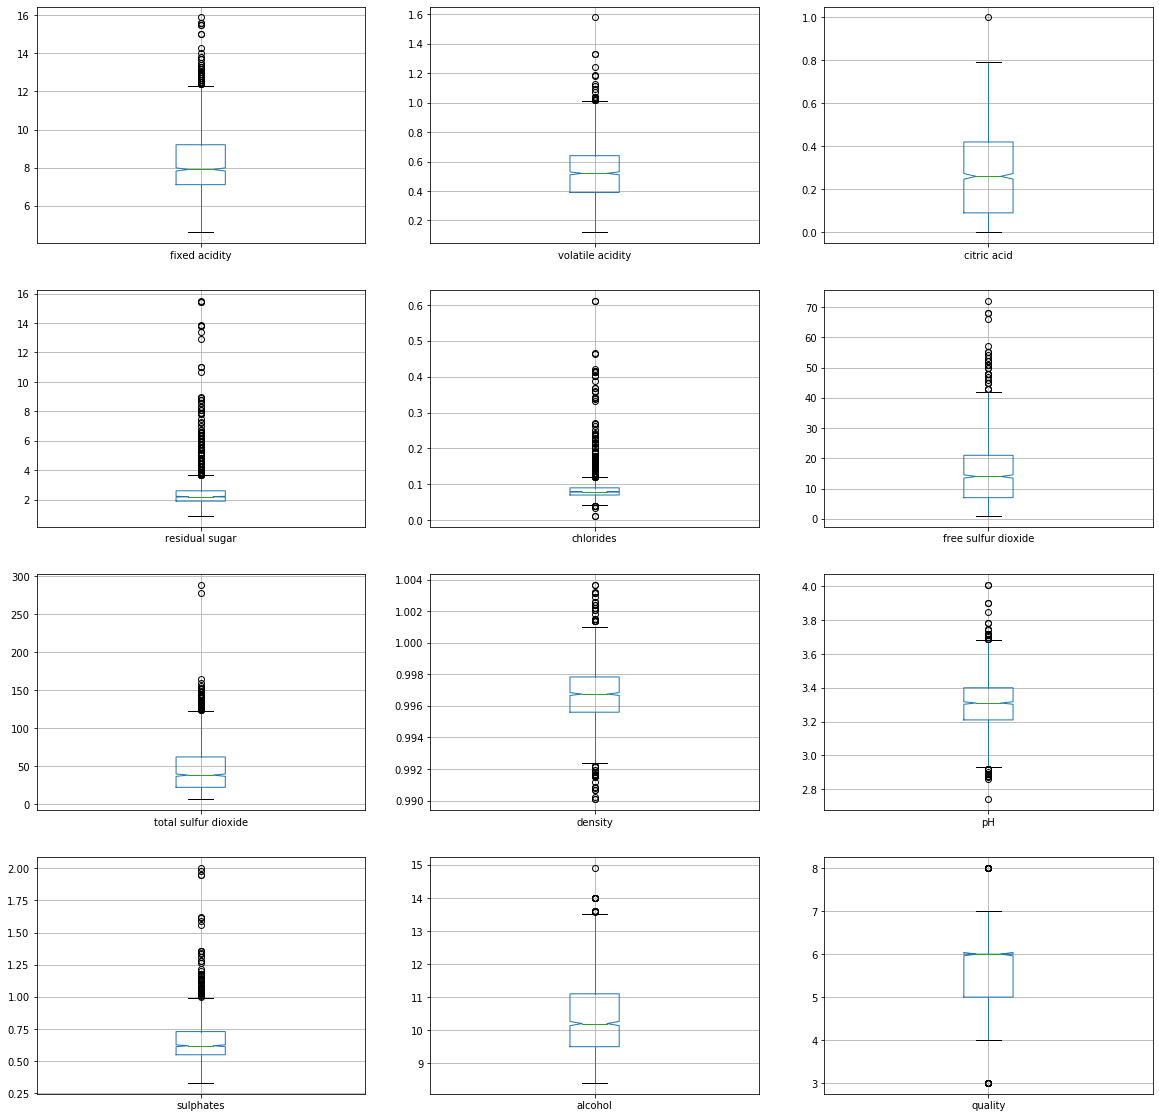

In [15]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(4,3),figsize=(20,20),grid=True,notch=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002119EF40648>,
      dtype=object)

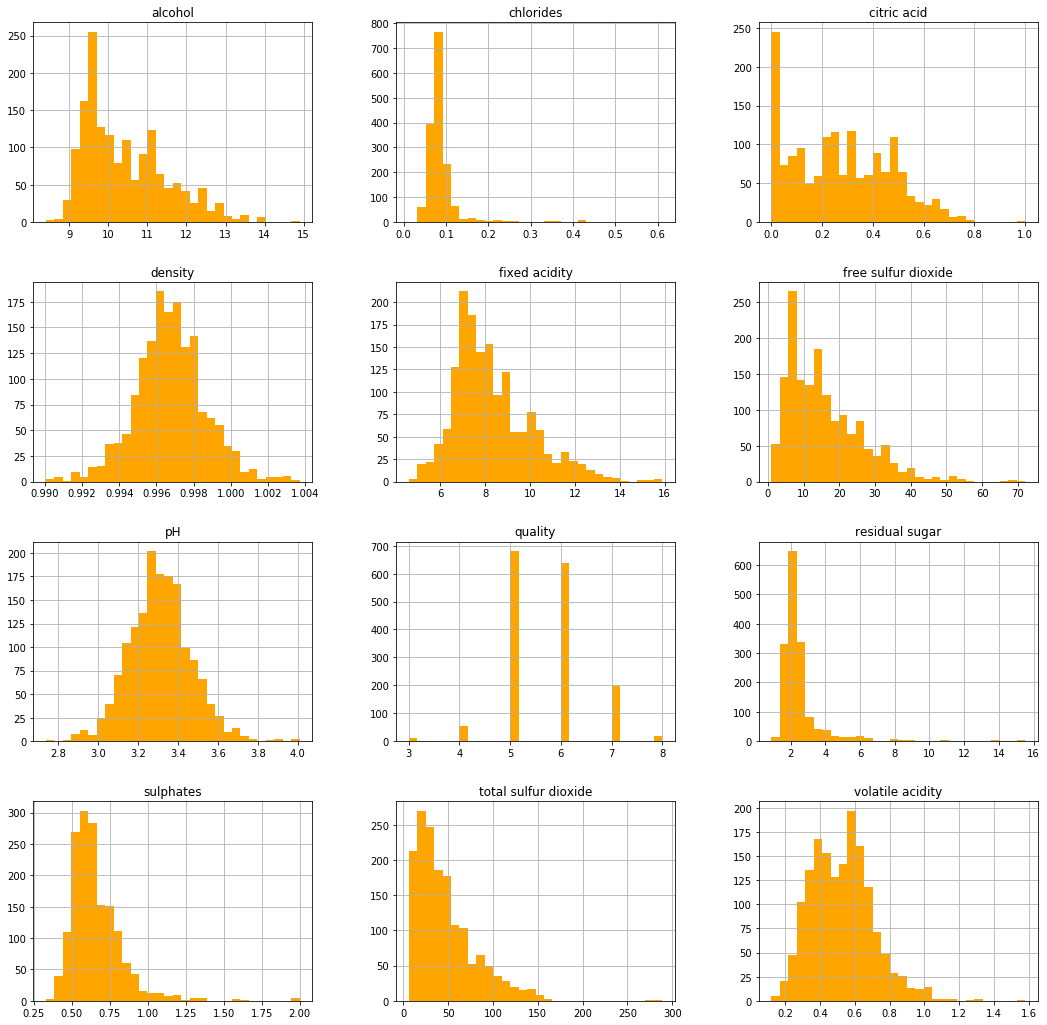

In [16]:
#plotting histograms for checking normal distribution
df.hist(figsize=(18,18),grid=True,layout=(4,3),bins=30,color='orange')

# Bivarient  Analysis

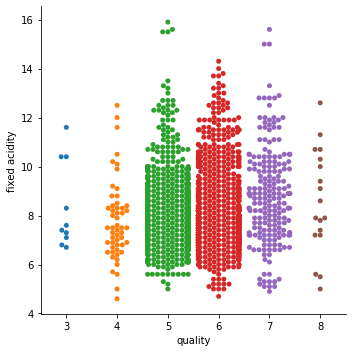

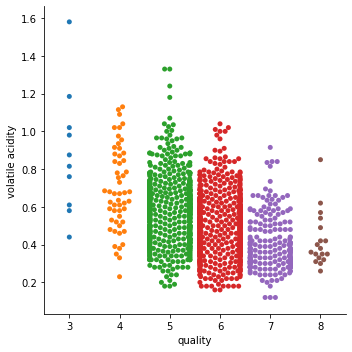

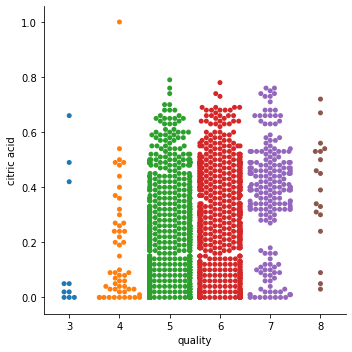

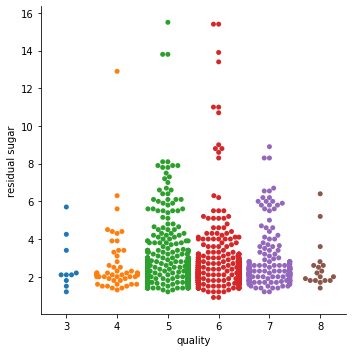

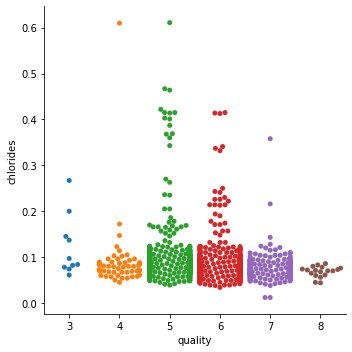

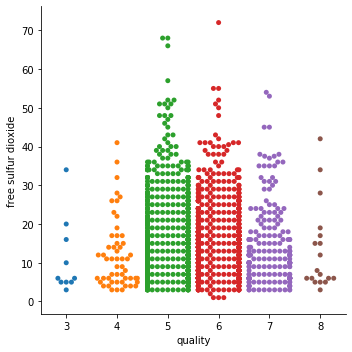

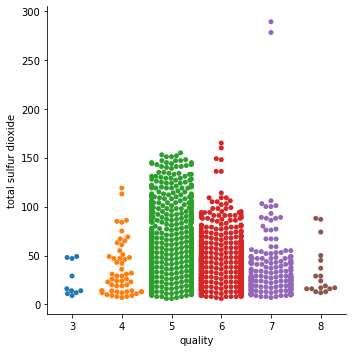

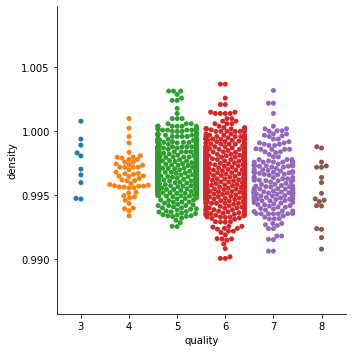

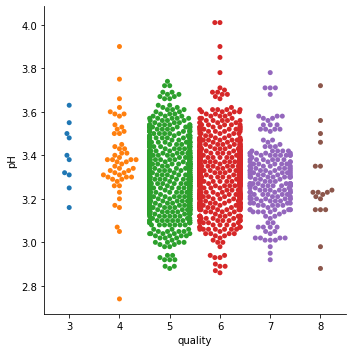

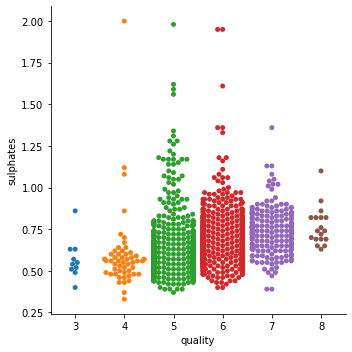

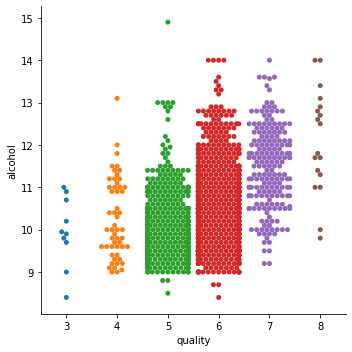

In [17]:
'''lets compare the quality vs 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'.
'''
m=df.drop(['quality'],axis=1).columns.values
for i in m:
    sns.catplot(x="quality", y=i, data=df,kind="swarm");
    plt.tight_layout()


In [18]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
df['quality']=np.where(df['quality']>=7,'Good','Not Good')

In [19]:
#let check 10 starting value after conversion of quality in terms of good or bad
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Not Good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Not Good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Not Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Not Good
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Not Good
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,Not Good
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,Good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,Good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,Not Good


In [20]:
# using Label Encoding to change the value in binary format
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['quality'])
df['quality']=le.transform(df['quality'])
df
# Here  Good= 0, Not Good=1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [21]:
df['quality'].value_counts()


1    1382
0     217
Name: quality, dtype: int64

Text(0.5, 6.79999999999999, '0 = Good , 1 = Not Good')

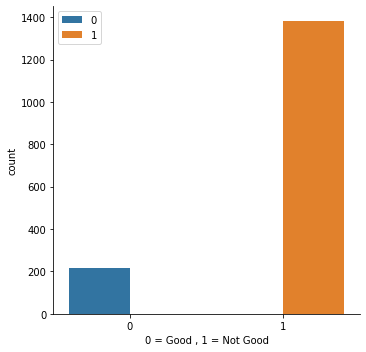

In [22]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='quality',data=df,kind='count',hue='quality')
plt.legend()
plt.xlabel("0 = Good , 1 = Not Good")
#here we we see data is imbalanced but both the classes have significant number of instances
# Good Quality Wines are less in number

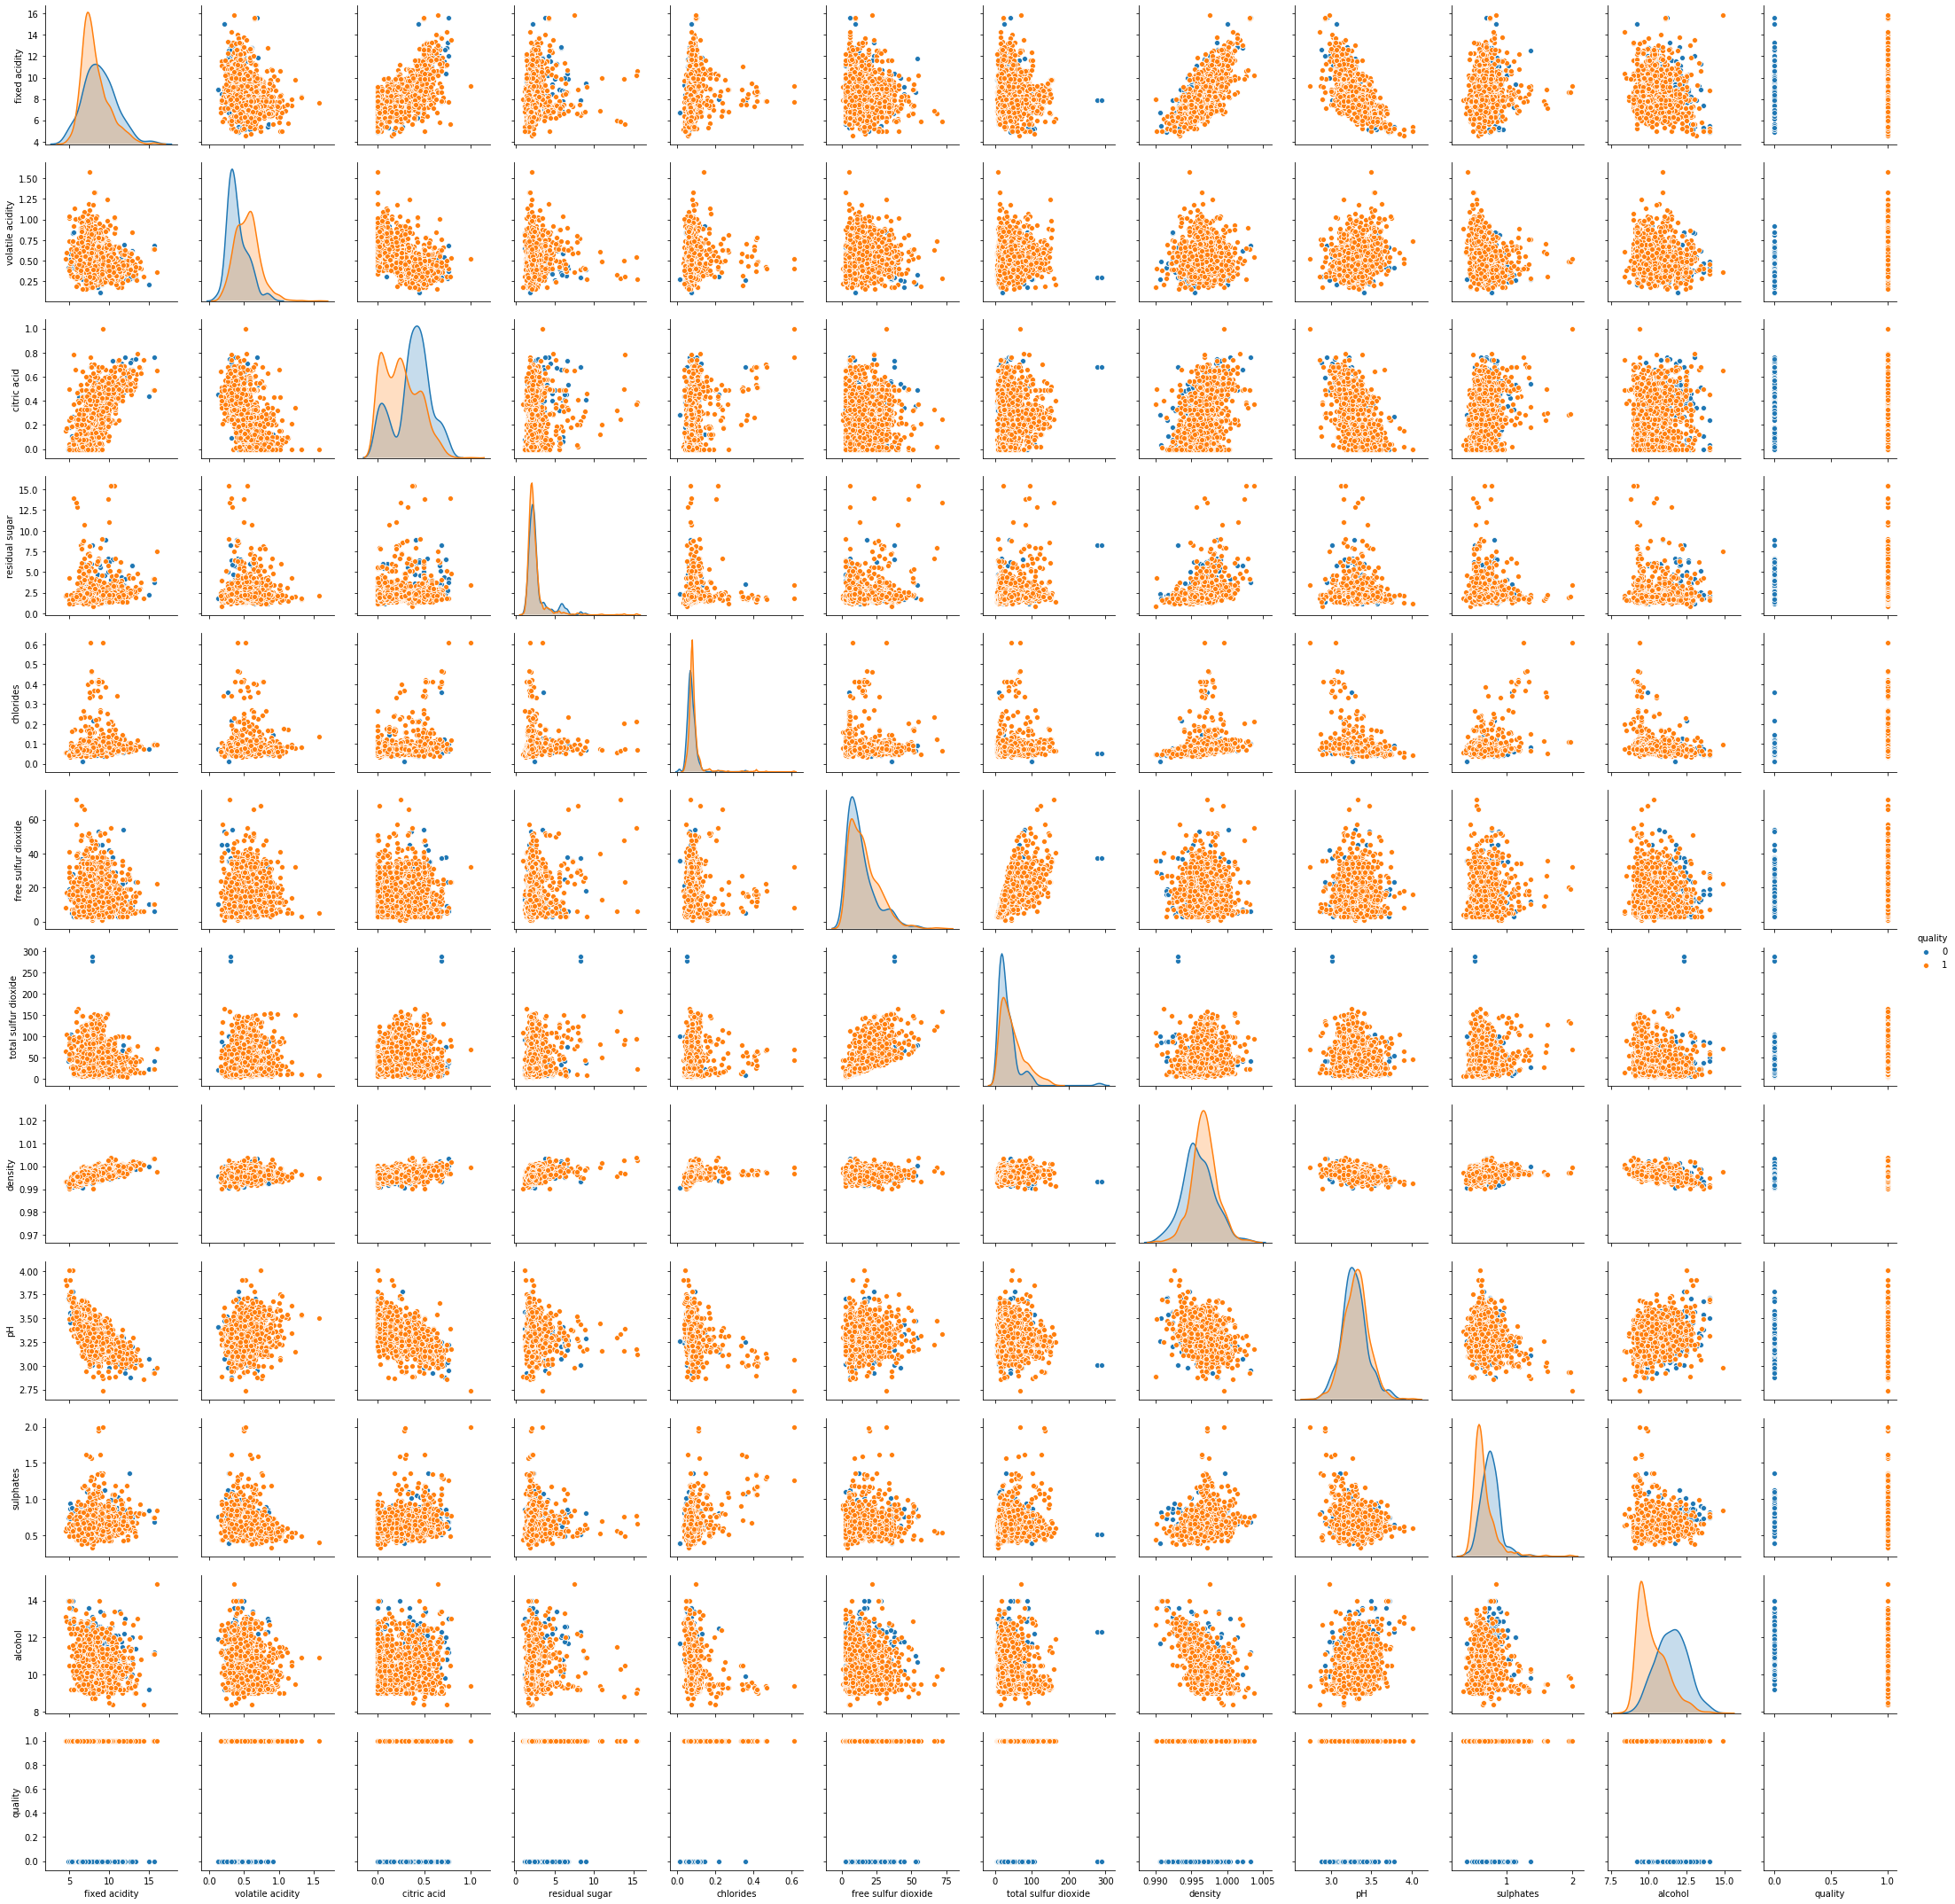

In [23]:
# Plotting the pairplot to analyze correlation between fields
sns.pairplot(df,hue='quality')

In [24]:
#checking skewness values
df.skew()
#From below output it is clear that skewness exist

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -2.129363
dtype: float64

In [25]:
#lets remove the skewness
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [26]:
#lets again check the skewness
df.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.677798
quality                -2.129363
dtype: float64

skewness still exist because of outliers

In [27]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)#shape of dataset before outliers remove
df_wine=df.loc[(z<3).all(axis=1)]
print(df_wine.shape)#shape of dataset after outliers removed

(1599, 12)
(1487, 12)


In [28]:
#lets again check the skewness after removing outliers
df_wine.skew()

fixed acidity           0.464932
volatile acidity        0.149449
citric acid             0.299542
residual sugar          1.489031
chlorides               1.851547
free sulfur dioxide    -0.077323
total sulfur dioxide   -0.040725
density                 0.066459
pH                      0.094822
sulphates               0.740707
alcohol                 0.596417
quality                -2.127843
dtype: float64

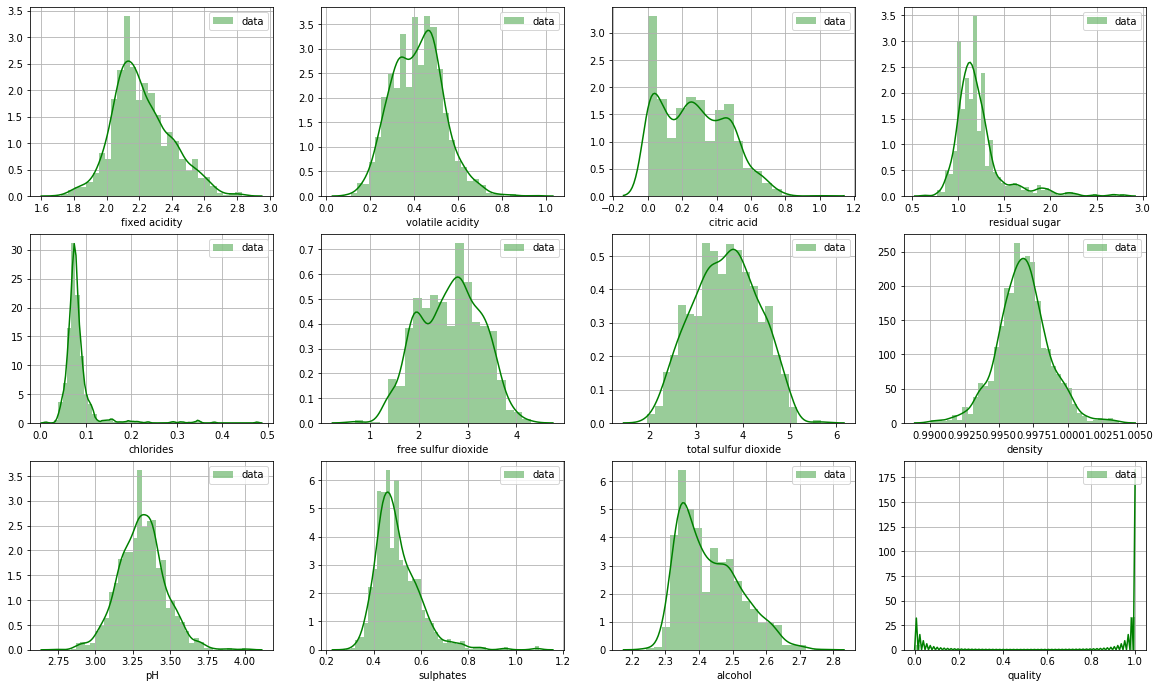

In [29]:
# Checking the Normal Distribution using distplot after removing outliers
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

(12.0, 0.0)

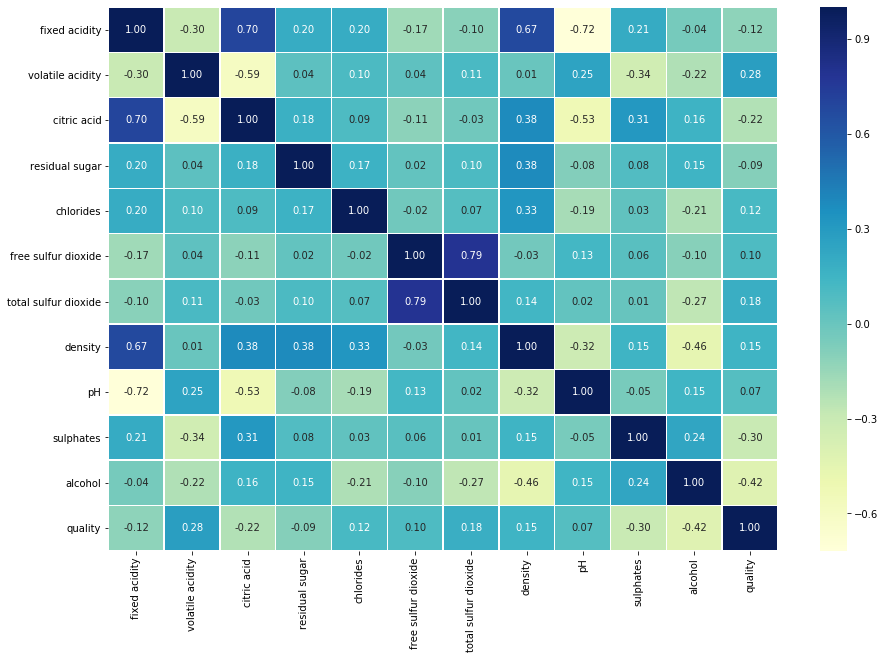

In [30]:
# Plotting Heatmap for Correlation
corr_matrix = df_wine.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Modeling


In [31]:
# Split data into X and y
X = df_wine.drop("quality", axis=1)

y = df_wine["quality"]

In [32]:
# Independent variables (no target column)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.128232,0.530628,0.00,1.064711,0.073250,2.484907,3.555348,0.9978,3.51,0.444686,2.341806
1,2.174752,0.631272,0.00,1.280934,0.093490,3.258097,4.219508,0.9968,3.20,0.518794,2.379546
2,2.174752,0.565314,0.04,1.193922,0.088011,2.772589,4.007333,0.9970,3.26,0.500775,2.379546
3,2.501436,0.246860,0.56,1.064711,0.072321,2.890372,4.110874,0.9980,3.16,0.457425,2.379546
4,2.128232,0.530628,0.00,1.064711,0.073250,2.484907,3.555348,0.9978,3.51,0.444686,2.341806


In [33]:
# Target variable
y


0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality, Length: 1487, dtype: int32

In [34]:
#checking shape of input variable
X.shape

(1487, 11)

In [35]:
#checking shape of target variable
y.shape

(1487,)

In [36]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.515050,1.019384,-1.383877,-0.623678,-0.262979,-0.232143,-0.079731,0.619044,1.370862,-0.626538,-1.025649
1,-0.245296,1.919324,-1.383877,0.392784,0.810288,1.035811,0.910470,0.045019,-0.807668,0.313365,-0.592579
2,-0.245296,1.329537,-1.175748,-0.016255,0.519727,0.239627,0.594137,0.159824,-0.386017,0.084838,-0.592579
3,1.649038,-1.518031,1.529931,-0.623678,-0.312284,0.432779,0.748507,0.733849,-1.088769,-0.464971,-0.592579
4,-0.515050,1.019384,-1.383877,-0.623678,-0.262979,-0.232143,-0.079731,0.619044,1.370862,-0.626538,-1.025649
...,...,...,...,...,...,...,...,...,...,...,...
1482,-1.408918,0.477287,-0.967618,-0.464307,0.422518,1.426781,0.294956,-1.045629,0.949211,-0.464971,0.128060
1483,-1.655707,0.193395,-0.863554,-0.160912,-0.957454,1.742251,0.510513,-0.919343,1.441137,0.903374,0.806105
1484,-1.328935,-0.040393,-0.707457,-0.016255,-0.262979,1.270482,0.156166,-0.563448,0.738385,0.831106,0.616431
1485,-1.655707,0.725305,-0.759489,-0.464307,-0.312284,1.426781,0.294956,-0.718435,1.792513,0.537847,-0.175261


In [37]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def maxrandomcore(model,x,y):
    max_acc_score=0
    for acc_state in range(42,100): 
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.30,stratify=y)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        accuracy_score1=accuracy_score(y_test,y_pred)
        if accuracy_score1 > max_acc_score:
            max_acc_score=accuracy_score1
            final_acc_state=acc_state
    print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)
    return final_acc_state

In [38]:
# Evaluate the model on the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.naive_bayes import MultinomialNB
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "XGBClassifier":XGBClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        acc_state=maxrandomcore(model,x,y)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.30)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [39]:
#learning scores of a model
model_scores = fit_and_score(models=models)

model_scores


max acc score corresponding to 42 is: 0.9038031319910514
max acc score corresponding to 96 is: 0.8993288590604027
max acc score corresponding to 93 is: 0.9284116331096197
max acc score corresponding to 42 is: 0.8903803131991052
max acc score corresponding to 88 is: 0.912751677852349
max acc score corresponding to 77 is: 0.8970917225950783
max acc score corresponding to 93 is: 0.9194630872483222
max acc score corresponding to 93 is: 0.9284116331096197


{'Logistic Regression': 0.8884615384615384,
 'KNN': 0.9105769230769231,
 'Random Forest': 0.9961538461538462,
 'GaussianNB': 0.8576923076923076,
 'SVC': 0.9028846153846154,
 'DecisionTreeClassifier': 1.0,
 'GradientBoostingClassifier': 0.9740384615384615,
 'XGBClassifier': 1.0}

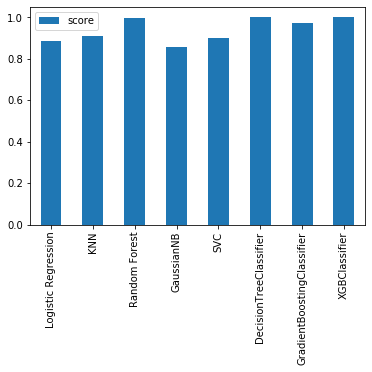

In [40]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

******************** SVC *********************


max acc score corresponding to 88 is: 0.912751677852349
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


Accuracy Score= 0.912751677852349


Cross_val_score= 0.8708946286127495


roc_auc_score =  0.7217361759959229


Classification report
               precision    recall  f1-score   support

           0       0.82      0.46      0.59        61
           1       0.92      0.98      0.95       386

    accuracy                           0.91       447
   macro avg       0.87      0.72      0.77       447
weighted avg       0.91      0.91      0.90       447



[[ 28  33]
 [  6 380]]





******************** Random Forest *********************


max acc score corresponding to 93 is: 0.930648769574944
RandomForestClassifier(bootstrap=True, class

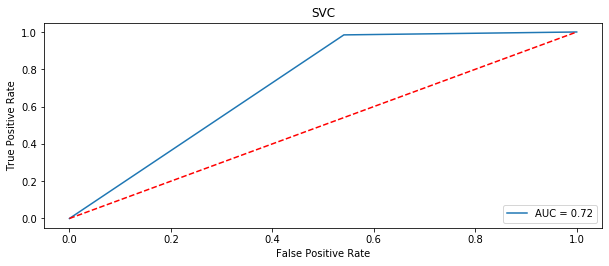

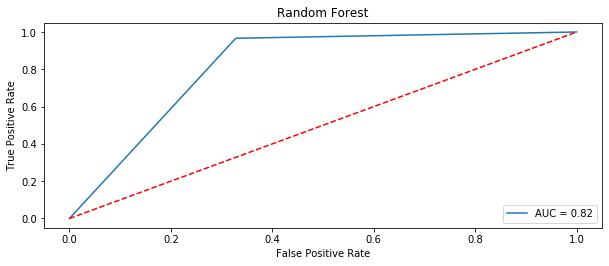

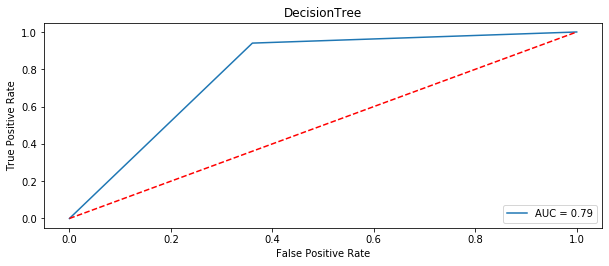

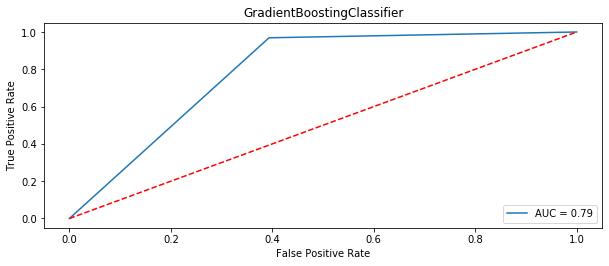

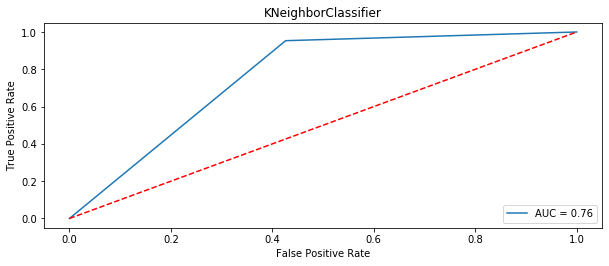

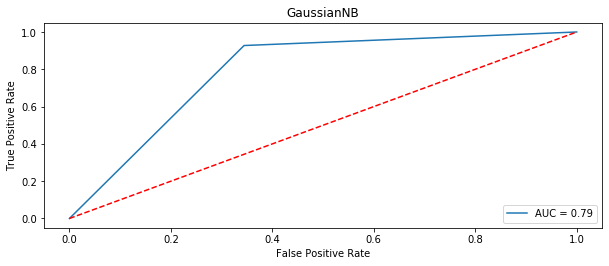

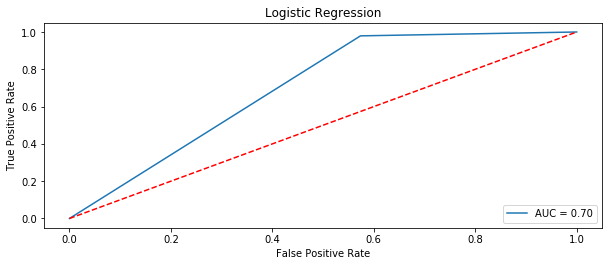

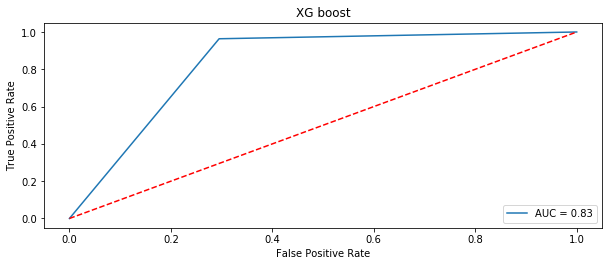

In [41]:
#Lists to store model name, Accuracy score, cross_val_score, Auc Roc score 
models =[]
models.append(("SVC",SVC()))
models.append(("Random Forest",RandomForestClassifier(n_estimators=100)))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("KNeighborClassifier",KNeighborsClassifier(n_neighbors=6)))
models.append(("GaussianNB",GaussianNB()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("XG boost",XGBClassifier()))

Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("********************",name,"*********************")
    print('\n')
    Model.append(name)
    acc_state=maxrandomcore(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.30,stratify=y)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label= 'AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n\n")



In [42]:
#lookover the accuracy_score,Cross_val_score,Roc_auc_curve in a DataFrame which we calculated above
result=pd.DataFrame({'Model':Model,'accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,accuracy_score,Cross_val_score,Roc_auc_curve
0,SVC,91.275168,87.089463,72.173618
1,Random Forest,92.617450,86.752537,81.922620
2,DecisionTree,89.932886,82.177028,78.987939
3,GradientBoostingClassifier,91.946309,85.339977,78.773465
4,KNeighborClassifier,90.156600,84.196778,76.356918
5,GaussianNB,89.038031,83.728335,79.159942
6,Logistic Regression,90.380313,87.155899,70.275206
7,XG boost,92.841163,86.415610,83.432430


In [43]:
#function to calculate accuracy,precision,recall and f1 score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [44]:
#for getting best set of parameters for DecisionTreeClassifier we will use grid searchCV
from sklearn.model_selection import GridSearchCV
gridR = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}


clfR = LogisticRegression()

# Setup GridSearchCV
gs_clfR = GridSearchCV(estimator=clfR,
                      param_grid=gridR,
                      cv=5, # 3-fold cross-validation
                      verbose=2) # print out progress

# Fit the GridSearchCV
gs_clfR.fit(x, y);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, solver=liblinear ......................
[CV] ....... C=0.00026366508987303583, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, solver=liblinear ......................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=0.615848211066026, solver=liblinear, total=   0.0s
[CV] C=0.615848211066026, solver=liblinear ...........................
[CV] ............ C=0.615848211066026, solver=liblinear, total=   0.0s
[CV] C=0.615848211066026, solver=liblinear ...........................
[CV] ............ C=0.615848211066026, solver=liblinear, total=   0.0s
[CV] C=1.623776739188721, solver=liblinear ...........................
[CV] ............ C=1.623776739188721, solver=liblinear, total=   0.0s
[CV] C=1.623776739188721, solver=liblinear ...........................
[CV] ............ C=1.623776739188721, solver=liblinear, total=   0.0s
[CV] C=1.623776739188721, solver=liblinear ...........................
[CV] ............ C=1.623776739188721, solver=liblinear, total=   0.0s
[CV] C=1.623776739188721, solver=liblinear ...........................
[CV] ............ C=1.623776739188721, solver=liblinear, total=   0.0s
[CV] C=1.623776739188721, solver=liblinear ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [45]:
# best parameters for DecisionTreeClassifier
print("Best parameter:",gs_clfR.best_params_)
print("score:",gs_clfR.best_score_)

Best parameter: {'C': 0.08858667904100823, 'solver': 'liblinear'}
score: 0.8742434431741762


In [46]:
#checking accuracy score using best parameters which calculated from gridsearchCV
clfR = LogisticRegression(C= 0.08858667904100823, solver='liblinear')
maxrandomcore(clfR,x,y)

max acc score corresponding to 42 is: 0.9105145413870246


42

In [47]:
#for getting best set of parameters for DecisionTreeClassifier we will use grid searchCV
gridD = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],'criterion':['gini','entropy']}

clfD = DecisionTreeClassifier()

# Setup GridSearchCV
gs_clfD = GridSearchCV(estimator=clfD,
                      param_grid=gridD,
                      cv=5, # 3-fold cross-validation
                      verbose=2) # print out progress

# Fit the GridSearchCV
gs_clfD.fit(x, y);

Fitting 5 folds for each of 588 candidates, totalling 2940 fits
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=2 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=2, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=2, min_samples_split=3 .

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_leaf_nodes=5, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=5, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=5, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=5, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5, min_samples_split=3 ...........
[CV]  criterion=gini, max_leaf_nodes=5, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5, min_samples_split=4 ...........
[CV]  criterion=gini, max_leaf_nodes=5, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5, min_samples_split=4 ...........
[CV]  criterion=gini, max_leaf_nodes=5, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=5, min_sample

[CV]  criterion=gini, max_leaf_nodes=11, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=11, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=11, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=11, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=11, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=11, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=11, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=11, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=11, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=11, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=11, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=11, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=11, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=11, mi

[CV]  criterion=gini, max_leaf_nodes=16, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=16, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=16, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=16, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=16, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=16, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=16, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=16, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=16, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=17, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=17, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=17, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=17, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=17, mi

[CV]  criterion=gini, max_leaf_nodes=22, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=22, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=22, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=22, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=22, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=22, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=22, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=22, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=22, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=22, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=22, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=22, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=22, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=22, mi

[CV]  criterion=gini, max_leaf_nodes=27, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=27, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=27, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=27, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=27, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=27, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=27, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=27, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=27, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=27, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=27, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=27, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=27, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=27, mi

[CV]  criterion=gini, max_leaf_nodes=32, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=32, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=32, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=32, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=32, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=32, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=32, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=32, mi

[CV]  criterion=gini, max_leaf_nodes=37, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=37, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=37, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=37, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=37, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=37, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=37, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=37, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=37, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=37, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=37, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=37, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=37, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=37, mi

[CV]  criterion=gini, max_leaf_nodes=41, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=41, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=41, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=41, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=41, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=41, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=41, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=41, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=41, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=42, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=42, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=42, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=42, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=42, mi

[CV]  criterion=gini, max_leaf_nodes=46, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=46, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=46, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=46, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=46, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=46, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=46, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=46, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=46, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=46, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=46, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=46, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=46, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=46, mi

[CV]  criterion=gini, max_leaf_nodes=50, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=50, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=50, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=51, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=51, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=51, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=51, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=51, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=51, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=51, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=51, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=51, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=51, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=51, mi

[CV]  criterion=gini, max_leaf_nodes=55, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=55, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=55, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=55, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=55, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=55, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=55, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=55, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=55, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=55, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=55, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=55, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=55, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=55, mi

[CV]  criterion=gini, max_leaf_nodes=59, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=59, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=59, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=59, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=59, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=59, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=59, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=59, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=59, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=60, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=60, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=60, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=60, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=60, mi

[CV]  criterion=gini, max_leaf_nodes=63, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=63, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=63, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=63, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=63, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=64, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=64, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=64, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=64, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=64, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=64, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=64, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=64, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=64, mi

[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=68, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=68, mi

[CV]  criterion=gini, max_leaf_nodes=72, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=72, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=72, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=72, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=72, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=72, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=72, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=72, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=72, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=72, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=72, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=72, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=72, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=72, mi

[CV]  criterion=gini, max_leaf_nodes=76, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=76, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=76, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=76, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=76, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=76, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=76, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=76, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=76, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=76, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=76, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=76, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=76, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=76, mi

[CV]  criterion=gini, max_leaf_nodes=80, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=80, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=80, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=80, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=80, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=80, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=80, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=80, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=80, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=80, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=80, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=80, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=80, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=80, mi

[CV]  criterion=gini, max_leaf_nodes=84, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=84, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=84, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=84, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=84, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=84, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=84, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=84, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=84, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=84, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=84, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=84, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=84, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=84, mi

[CV]  criterion=gini, max_leaf_nodes=87, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=87, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=87, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=88, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=88, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=88, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=88, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=88, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=88, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=88, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=88, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=88, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=88, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=88, mi

[CV]  criterion=gini, max_leaf_nodes=91, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=91, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=91, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=91, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=91, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=91, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=91, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=91, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=91, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=91, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=91, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=92, min_samples_split=2 ..........
[CV]  criterion=gini, max_leaf_nodes=92, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=92, mi

[CV]  criterion=gini, max_leaf_nodes=96, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=96, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=96, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=96, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=96, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=96, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=96, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=96, min_samples_split=3 ..........
[CV]  criterion=gini, max_leaf_nodes=96, min_samples_split=3, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=96, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=96, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=96, min_samples_split=4 ..........
[CV]  criterion=gini, max_leaf_nodes=96, min_samples_split=4, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=96, mi

[CV] criterion=entropy, max_leaf_nodes=4, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=4, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=4, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=4, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=4, min_samples_split=3 ........
[CV]  criterion=entropy, max_leaf_nodes=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=4, min_samples_split=3 ........
[CV]  criterion=entropy, max_leaf_nodes=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=4, min_samples_split=3 ........
[CV]  criterion=entropy, max_leaf_nodes=4, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=4, min_samples_split=3 ........
[CV]  criterion=entropy, max_leaf_n

[CV]  criterion=entropy, max_leaf_nodes=8, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=9, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=9, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=9, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=9, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=9, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=9, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=9, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=9, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=9, min_samples_split=2 ........
[CV]  criterion=entropy, max_leaf_nodes=9, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=9, min_samples_split=3 ........
[CV]  criterion=entropy, max_leaf_nodes=9, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_

[CV]  criterion=entropy, max_leaf_nodes=13, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=13, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=13, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=13, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=13, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=13, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=13, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=13, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=13, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=13, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=13, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=14, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=14, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=17, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=18, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=18, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=18, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=18, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=18, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=18, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=18, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=18, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=18, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=18, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=18, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=18, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=22, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=22, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=22, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=22, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=22, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=22, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=22, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=22, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=22, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=22, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=22, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=22, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=22, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=26, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=26, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=30, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=30, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=30, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=30, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=30, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=30, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=30, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=30, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=30, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=30, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=30, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=30, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=30, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=34, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=34, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=34, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=34, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=34, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=34, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=34, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=34, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=34, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=34, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=34, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=34, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=34, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=38, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=38, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=38, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=38, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=38, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=38, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=38, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=38, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=38, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=38, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=38, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=38, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=38, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=41, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=42, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=42, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=42, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=42, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=42, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=42, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=42, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=42, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=42, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=42, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=42, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=42, min_samples_split=3, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=45, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=45, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=45, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=45, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=45, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=45, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=45, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=45, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=45, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=45, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=45, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=46, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=46, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=50, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=50, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=50, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=50, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=50, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=50, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=50, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=51, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=51, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=51, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=51, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=51, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=51, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=54, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=54, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=54, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=54, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=54, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=54, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=54, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=54, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=54, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=54, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=54, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=54, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=54, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=59, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=59, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=59, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=59, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=59, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=59, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=59, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=59, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=59, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=59, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=59, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=59, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=59, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=64, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=64, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=64, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=64, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=64, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=64, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=64, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=64, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=64, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=64, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=64, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=65, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=65, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=69, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=69, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=69, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=69, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=69, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=69, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=69, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=69, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=69, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=69, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=69, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=69, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=69, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=74, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=74, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=74, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=74, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=74, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=74, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=74, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=74, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=74, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=74, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=74, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=74, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=74, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=79, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=79, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=79, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=79, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=79, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=79, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=79, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=79, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=79, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=79, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=79, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=79, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=79, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=84, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=84, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=84, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=84, min_samples_split=3 .......
[CV]  criterion=entropy, max_leaf_nodes=84, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=84, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=84, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=84, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=84, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=84, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=84, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=84, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=84, min_samples_split=4, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=89, min_samples_split=3, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=89, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=89, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=89, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=89, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=89, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=89, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=89, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=89, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=89, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=89, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=90, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=90, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_leaf_nodes=94, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=94, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=94, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=94, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=94, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=94, min_samples_split=4 .......
[CV]  criterion=entropy, max_leaf_nodes=94, min_samples_split=4, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=95, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=95, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=95, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=95, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=95, min_samples_split=2 .......
[CV]  criterion=entropy, max_leaf_nodes=95, min_samples_split=2, total=   0.0s
[CV] criterion=entrop

[Parallel(n_jobs=1)]: Done 2940 out of 2940 | elapsed:   18.1s finished


In [48]:
# best parameters for DecisionTreeClassifier
print("Best parameter:",gs_clfD.best_params_)
print("score:",gs_clfD.best_score_)

Best parameter: {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 2}
score: 0.8850033624747814


In [49]:
#checking accuracy score using best parameters which calculated from gridsearchCV
dtc=DecisionTreeClassifier(criterion = 'gini',max_leaf_nodes=4, min_samples_split= 2,)
maxrandomcore(dtc,x,y)

max acc score corresponding to 85 is: 0.9060402684563759


85

In [50]:
#use gridsearchcv to find out best parameters for KNeighborsClassifier
grid_1={'n_neighbors':[3,5,11,19],
            'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']
            }
# Setup GridSearchCV
gs_clf1 = GridSearchCV(KNeighborsClassifier(),
                      param_grid=grid_1,
                      cv=5, # 5-fold cross-validation
                      verbose=2,
                      n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf1.fit(x, y);


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  57 out of  80 | elapsed:    3.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.1s finished


In [51]:
# best parameters for KNeighborsClassifier
print("Best parameter:",gs_clf1.best_params_)
print("score:",gs_clf1.best_score_)

Best parameter: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
score: 0.8668459986550101


In [52]:
#checking accuracy score using best parameters which calculated from gridsearchCV
knn=KNeighborsClassifier(metric='euclidean', n_neighbors= 11, weights= 'distance')
maxrandomcore(knn,x,y)

max acc score corresponding to 44 is: 0.930648769574944


44

In [53]:
#lets use gridsearchcv to find out best parameters for RandomForestClassifier
grid = {'n_estimators': [500, 1000, 1500],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x, y);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   1.3s
[CV] max_depth=None, max_feature

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   2.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   2.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   2.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   2.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   2.2s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.4s
[CV] max_depth=None, max_f

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   2.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   2.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   1.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   1.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.7s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   1.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   1.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   1.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   1.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   1.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   2.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   2.2s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   2.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, total=   2.2s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  8.1min finished


In [54]:
# best parameters for RandomForestClassifier
print("Best parameter:",gs_clf.best_params_)
print("score:",gs_clf.best_score_)

Best parameter: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1000}
score: 0.8836583725622058


In [55]:
#checking accuracy score using best parameters which calculated from gridsearchCV
rf=RandomForestClassifier(n_estimators=1000,max_depth=5, min_samples_leaf= 2, max_features= 'auto',min_samples_split=6)
maxrandomcore(rf,x,y)

max acc score corresponding to 43 is: 0.9060402684563759


43

In [56]:
#lets use gridsearchcv to find out best parameters for XGBClassifier
grid_3 = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]
         }
clf = XGBClassifier()

# Setup GridSearchCV
gs_clf3 = GridSearchCV(estimator=clf,
                      param_grid=grid_3,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf3.fit(x, y);

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [57]:
# best parameters for XGBClassifier
print("Best parameter:",gs_clf3.best_params_)
print("score:",gs_clf3.best_score_)

Best parameter: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}
score: 0.8802958977807667


In [58]:
#checking accuracy score using best parameters which calculated from gridsearchCV
xg=XGBClassifier(colsample_bytree=0.7,learning_rate=0.05,max_depth= 6,min_child_weight= 11,missing=-999,n_estimators= 5,nthread= 4,objective= 'binary:logistic',
 seed= 1337,
 silent= 1,
 subsample= 0.8)
maxrandomcore(xg,x,y)

max acc score corresponding to 65 is: 0.8903803131991052


65

In [59]:
#lets use gridsearchcv to find out best parameters for SVC
grid_4 = { 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000],'kernel':['linear','poly','rbf']
         }
clf = SVC()

# Setup GridSearchCV
gs_clf4 = GridSearchCV(estimator=clf,
                      param_grid=grid_4,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

gs_clf4.fit(x, y);

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.4s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.4s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   5.3s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.6s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.5s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV] ................. C=100, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV] ................. C=100, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.9min finished


In [60]:
#best parameters for svc
print("Best parameter:",gs_clf4.best_params_)
print("score:",gs_clf4.best_score_)

Best parameter: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
score: 0.8742434431741762


In [61]:
#checking accuracy score using best parameters which calculated from gridsearchCV
svc=SVC(C=1000,gamma=0.001)
maxrandomcore(svc,x,y)

max acc score corresponding to 80 is: 0.9105145413870246


80

In [62]:
#using AdaBoostClassifier base_estimator as dtc
from sklearn.ensemble import AdaBoostClassifier
dtc=DecisionTreeClassifier(max_leaf_nodes=4, min_samples_split= 2,random_state=82)
ad = AdaBoostClassifier(n_estimators=100, base_estimator=dtc)
ad.fit(x_train, y_train)
ad.score(x_train,y_train)
adpred=ad.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,adpred))
print('Confusion Matrix:',confusion_matrix(y_test,adpred))
print('Classification Report:',classification_report(y_test,adpred))


Accuracy Score: 0.8970917225950783
Confusion Matrix: [[ 39  22]
 [ 24 362]]
Classification Report:               precision    recall  f1-score   support

           0       0.62      0.64      0.63        61
           1       0.94      0.94      0.94       386

    accuracy                           0.90       447
   macro avg       0.78      0.79      0.78       447
weighted avg       0.90      0.90      0.90       447



# After all this process conclusion is that KNeighborsClassifier is performing well.

In [63]:
#lets make our final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=44,test_size=0.30,stratify=y)
knn=KNeighborsClassifier(metric='euclidean', n_neighbors= 11, weights= 'distance')
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
evaluate_preds(y_test,knnpred)

Acc: 93.06%
Precision: 0.94
Recall: 0.98
F1 score: 0.96


{'accuracy': 0.93, 'precision': 0.94, 'recall': 0.98, 'f1': 0.96}

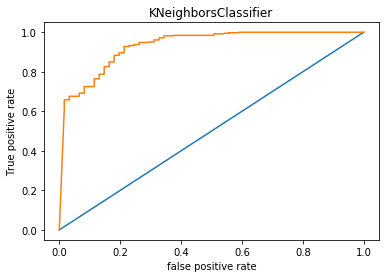

roc_auc_score =  0.9321116113140236


In [64]:
# Make predictions with probabilities
y_probs = knn.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

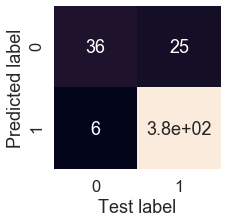

In [65]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, knnpred):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, knnpred),
                     annot=True,
                     cbar=False)
    plt.xlabel("Test label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, knnpred)

In [66]:
#lets printed confusion_matrix
print(confusion_matrix(y_test, knnpred))

[[ 36  25]
 [  6 380]]


In [67]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=knnpred
test
# On the lest side values are those fields which are taken by machine for test...

,quality,Predicted values
1163,1,1
1463,1,1
212,1,1
1387,1,1
1210,1,1
...,...,...
1313,1,1
903,0,0
1426,1,1
209,0,1


In [68]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(knnpred)
df1.to_csv('Red_wine_submission.csv')

In [69]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(knn,'Red_wine_submission.pkl')

['Red_wine_submission.pkl']

In [70]:
#lets read the model using joblib
knn_from_joblib=joblib.load('Red_wine_submission.pkl')
joblib_y_preds = knn_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 93.06%
Precision: 0.94
Recall: 0.98
F1 score: 0.96


{'accuracy': 0.93, 'precision': 0.94, 'recall': 0.98, 'f1': 0.96}